# Punto 0

Nombres de empresas:
ANSS-Ansys Inc.; GOOG-Google; GTQ1.F-Siemens; MSFT-Microsoft;
TM-Toyota Motors

DataFrame:
Date-Open-High-Low-Close-Adj Close-Volume

Funciones

In [36]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv


u=np.ones(5)
Names=['ANSYS','GOOGLE','SIEMENS','MICROSOFT','TOYOTA']
Symbols=['ANSS','GOOG','GTQ1.F','MSFT','TM']

    
def llamarDatos (nombreArchivo):
    serie=os.path.join('.',nombreArchivo+'.csv')
    serie_pd = pd.read_csv(serie, sep = ',',encoding='latin-1')
    serie_pd =serie_pd.drop(0,axis=0)
    return serie_pd

def rendHist (TipoCosteo,symbol):
    Rend=[]
    for x in range(1,25):
        data=llamarDatos(symbol)[TipoCosteo]
        rend_n=np.log(data[x+1]/data[x])
        Rend=np.append(Rend,rend_n)
    return Rend

def rendProm (TipoCosteo):
    R=pd.DataFrame({'Names':Names,
                'Symbols':Symbols})
    Rend=[]
    for n in Symbols:
        r=rendHist(TipoCosteo,n)
        Rend=np.append(Rend,np.mean(r))
    R['Rendimientos']=Rend
    return R

def matrixS (TipoCosteo):
    anss=rendHist(TipoCosteo,'ANSS')
    goog=rendHist(TipoCosteo,'GOOG')
    gtq1=rendHist(TipoCosteo,'GTQ1.F')
    msft=rendHist(TipoCosteo,'MSFT')
    tm=rendHist(TipoCosteo,'TM')
    X=[anss,goog,gtq1,msft,tm]
    S=np.cov(X)
    return S

def varianzas(TipoCosteo):
    r=rendProm (TipoCosteo)
    variances=[]
    for name in r['Symbols']:
        data=rendHist(TipoCosteo,name)
        var=np.var(data,axis=0)
        variances=np.append(variances,var)
    return variances

def ABCD(TipoCosteo):
    S=matrixS(TipoCosteo)
    r=rendProm(TipoCosteo)['Rendimientos']
    A=np.dot(u.T,np.dot(inv(S),u))
    B=np.dot(u.T,np.dot(inv(S),r))
    C=np.dot(r.T,np.dot(inv(S),r))
    D=A*C-B**2
    return {'A':A,'B':B,'C':C,'D':D}

def var_r(TipoCosteo):
    A=ABCD(TipoCosteo)['A']
    B=ABCD(TipoCosteo)['B']
    C=ABCD(TipoCosteo)['C']
    D=ABCD(TipoCosteo)['D']
    r=np.linspace(min(rendProm(TipoCosteo)['Rendimientos']),3*max(rendProm(TipoCosteo)['Rendimientos']))
    varR=[]
    var=[((A*value**2-2*B*value+C)/D) for value in r]
    varR=np.append(varR,var)
    return varR,r

tipoCosteo='High'

In [37]:
r=rendProm(tipoCosteo)#Vector r
S=matrixS(tipoCosteo)#Matriz S
r

,Names,Symbols,Rendimientos
0,ANSYS,ANSS,0.023960
1,GOOGLE,GOOG,0.014179
2,SIEMENS,GTQ1.F,-0.012498
3,MICROSOFT,MSFT,0.020633
4,TOYOTA,TM,0.007993


# Punto 2 PP

## 2.e

In [38]:
v=np.linalg.eigvals(S)#Valores propios de la matriz S
if all(item>0 for item in v):
    print('La matriz si es definitivamente positiva')
print (v)

La matriz si es definitivamente positiva
[0.00629634 0.0032857  0.00220434 0.00019019 0.00107305]


## 2.f

In [39]:
if (np.linalg.det(S)>0)and(len(S[:,0]==len(S[0,:]))):
    print ('La matríz es invertible, su determinante es: ',np.linalg.det(S))
else:
    print ('La matríz no es invertible, su determinante es: ',np.linalg.det(S))

La matríz es invertible, su determinante es:  9.306865145345586e-15


# Punto 3

**Varianza-Retorno**

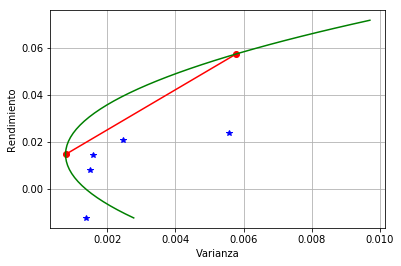

{'A': 1287.2110886628907, 'B': 18.801519881705456, 'C': 0.6419437783216839, 'D': 472.81999989165854}



,Names,Symbols,Rendimientos,Varianzas
0,ANSYS,ANSS,0.023960,0.002472
1,GOOGLE,GOOG,0.014179,0.001580
2,SIEMENS,GTQ1.F,-0.012498,0.005585
3,MICROSOFT,MSFT,0.020633,0.001506
4,TOYOTA,TM,0.007993,0.001363


In [40]:
r['Varianzas']=varianzas(tipoCosteo)

var=sorted(r['Varianzas'].values); retorno=sorted(r['Rendimientos'].values)
A=ABCD(tipoCosteo)['A']; B=ABCD(tipoCosteo)['B']; C=ABCD(tipoCosteo)['C']; D=ABCD(tipoCosteo)['D']
rEf=max(var_r(tipoCosteo)[1])*0.8; varEf=(A*rEf**2-2*B*rEf+C)/D

PiEf=[varEf,rEf]
vertice=[1/A,B/A]

plt.plot(vertice[0],vertice[1],'ro'); plt.plot(PiEf[0],PiEf[1],'ro') #Vertice frontera eficiente; Portafolio eficiente
plt.plot([vertice[0],PiEf[0]],[vertice[1],PiEf[1]],'r-')# x*


plt.plot(var,retorno,'b*') #Portafolios evaluados
plt.plot(var_r(tipoCosteo)[0],var_r(tipoCosteo)[1],'g') #Frontera eficiente


plt.xlabel('Varianza');plt.ylabel('Rendimiento')
plt.grid()
plt.show()

print (ABCD(tipoCosteo))
print('')
r

**Desviación-Retorno**

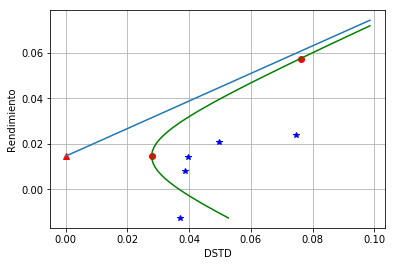

In [41]:
desv=np.sqrt(varianzas(tipoCosteo)) #Desviación
r['Desviaciones']=desv
DSTD=sorted(r['Desviaciones'])
desvEf=np.linspace(0,max(np.sqrt(var_r(tipoCosteo)[0])))
retEf=np.sqrt(D/A)*desvEf+(B/A)

plt.plot(np.sqrt(vertice[0]),vertice[1],'ro'); plt.plot(0,vertice[1],'r^'); plt.plot(np.sqrt(PiEf[0]),PiEf[1],'ro')#Vertice frontera eficiente; Portafolio eficiente
plt.plot(desvEf,retEf) #Asíntota de la curva

plt.plot(DSTD,retorno,'b*') #Portafolios evaluados
plt.plot(np.sqrt(var_r(tipoCosteo)[0]),var_r(tipoCosteo)[1],'g') #Frontera eficiente


plt.xlabel('DSTD');plt.ylabel('Rendimiento')
plt.grid()
plt.show()



**($\sigma_m, r_m$) vs (0, $r_p$)**

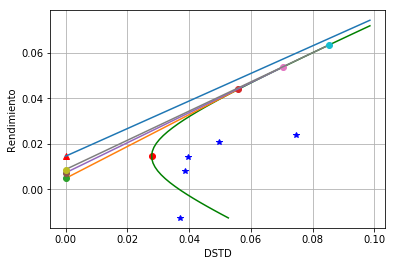

portafolios de mercado: [[0.05581096 0.04391158]
 [0.07023746 0.05367997]
 [0.08527186 0.06344836]]

tasas libres de riesgo [0.0048688  0.0073032  0.00876384]


In [67]:
rps=np.array([vertice[1]/3,vertice[1]/2,vertice[1]*0.6])
rms=(C-B*rps)/(B-A*rps)
sigmams=np.sqrt((rms-rps)/(B-A*rps))
coordms=np.transpose(np.matrix([sigmams,rms]))

plt.plot(np.sqrt(vertice[0]),vertice[1],'ro'); plt.plot(0,vertice[1],'r^')#Vertice frontera eficiente; Portafolio eficiente
plt.plot(desvEf,retEf) #Asíntota de la curva

plt.plot(DSTD,retorno,'b*') #Portafolios evaluados
plt.plot(np.sqrt(var_r(tipoCosteo)[0]),var_r(tipoCosteo)[1],'g') #Frontera eficiente

for i in range(3):
    x=np.linspace(0,coordms[i,0])
    y=np.linspace(rps[i],coordms[i,1])
    plt.plot(x,y)
    plt.plot(0,rps[i],'o')
    plt.plot(coordms[i,0],coordms[i,1],'o')


plt.xlabel('DSTD');plt.ylabel('Rendimiento')
plt.grid()
plt.show()

print('portafolios de mercado:',coordms)
print('')
print('tasas libres de riesgo',rps)

Las líneas de mercado de capital tienen las siguientes funciones:

* $r_1(\sigma)=0.005+0.70\sigma$
* $r_2(\sigma)=0.007+0.66\sigma$
* $r_3(\sigma)=0.009+0.64\sigma$

# Punto 5

In [ ]:
#Asum 